In [1]:
#importing necessary liberaries
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Uploading the Raw Data

The dataset are in txt format and there are 4 Train sets in which we are going to use "train_FD001.txt" file.


In [2]:
#uploading the dataset
raw_data = pd.read_csv('/content/drive/MyDrive/ML Projects/Predictive Maintenance using NASA Engine Degradation Dataset/Engine Degration NASA Dataset/train_FD001.txt', sep=' ', header = None)
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


Striping the Last two Coloums (Nan) and also giving the columns names.

In [3]:
raw_data = raw_data[[i for i in range(0,26)]]
raw_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


The ID column represents the Engine ID as we can see there are 1 to 100 engine IDs and each of them has n number of cycles per engine. The cycles represt the time, cycle 1 is always a healthy engine and it continous till the engine breaks.

Lets consider only engine 1 data:

Cycle 1= Engine Healthy

Cycle 192 = Breakdown


In [4]:
raw_data[raw_data['ID'] == 1]

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


Computing outcome variable Remaining Useful Life (RUL)

In [5]:
raw_data['RUL'] = raw_data.groupby('ID')['Cycle'].transform(max) - raw_data['Cycle']
raw_data.head()

<ipython-input-5-2a98fad1d862>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  raw_data['RUL'] = raw_data.groupby('ID')['Cycle'].transform(max) - raw_data['Cycle']


,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [6]:
Max_Cycle_df = raw_data.groupby(['ID'], sort= False )['Cycle'].max().reset_index()
Max_Cycle_df.columns = ['ID', 'Max Cycle']
Max_Cycle_df

,ID,Max Cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [7]:
Max_Cycle_df.head()

,ID,Max Cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269


In [8]:
raw_data.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


EDA


In [9]:
print(raw_data.shape)
list(raw_data)

(20631, 27)


['ID',
 'Cycle',
 'OpSet1',
 'OpSet2',
 'OpSet3',
 'SensorMeasure1',
 'SensorMeasure2',
 'SensorMeasure3',
 'SensorMeasure4',
 'SensorMeasure5',
 'SensorMeasure6',
 'SensorMeasure7',
 'SensorMeasure8',
 'SensorMeasure9',
 'SensorMeasure10',
 'SensorMeasure11',
 'SensorMeasure12',
 'SensorMeasure13',
 'SensorMeasure14',
 'SensorMeasure15',
 'SensorMeasure16',
 'SensorMeasure17',
 'SensorMeasure18',
 'SensorMeasure19',
 'SensorMeasure20',
 'SensorMeasure21',
 'RUL']

How many life-to-death life cycle we have and what they do look like?


In [10]:
len( raw_data[raw_data['RUL'] == 0])

100

This graph show that all the engine don't break at the same time

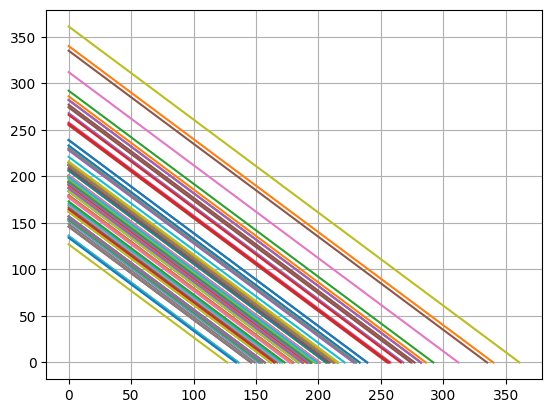

In [11]:
#ploting
one_engine = []
for i,r in raw_data.iterrows():
    rul = r["RUL"]
    one_engine.append(rul)
    if r['RUL'] == 0:
      plt.plot(one_engine)
      one_engine = []
plt.grid()



##Sperating the right feature for the model

In [ ]:
#percentage of time the RUl at 0

per = len(raw_data[raw_data['RUL'] == 0])/len(raw_data) * 100
print(f"Percentage of time the RUl at 0 = {np.round(per,2)} %")

Percentage of time the RUl at 0 = 0.48 %


##Binary Outcome
let's assume 20 cycles pior to the breakdown so this way we can predict the failure

In [12]:
#creating the outcome variable 0 or 1
raw_data['RUL'] = [1 if out < 20 else 0 for out in raw_data['RUL']]

In [13]:
per = np.mean(raw_data['RUL']) * 100
print(f"Percentage of time the RUl at 0 = {np.round(per,2)} %")

Percentage of time the RUl at 0 = 9.69 %


so, 9.69% of times the data under 20 cycles is before dying

This shows that,
for 18631 times the engines are running fine and for 2000 times its under failure.

In [14]:
raw_data['RUL'].value_counts()

,count
RUL,
0,18631
1,2000


## Splitting the dataset into the Training set and Test set

In [15]:
X = raw_data.drop(['RUL', 'ID'], axis = 1)
y = raw_data['RUL']

In [16]:
X

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [17]:
y

,RUL
0,0
1,0
2,0
3,0
4,0
...,...
20626,1
20627,1
20628,1
20629,1


In [18]:
X.isnull().sum()

,0
Cycle,0
OpSet1,0
OpSet2,0
OpSet3,0
SensorMeasure1,0
SensorMeasure2,0
SensorMeasure3,0
SensorMeasure4,0
SensorMeasure5,0
SensorMeasure6,0


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
X_train.head()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
5416,108,-0.0048,-0.0000,100.0,518.67,642.50,1586.58,1410.20,14.62,21.61,...,521.28,2388.10,8152.68,8.4409,0.03,394,2388,100.0,38.73,23.3405
12333,27,-0.0014,0.0004,100.0,518.67,642.26,1587.05,1409.20,14.62,21.61,...,521.74,2388.00,8135.92,8.4508,0.03,394,2388,100.0,38.92,23.3530
12124,183,0.0014,0.0000,100.0,518.67,643.48,1609.91,1423.40,14.62,21.61,...,519.65,2388.31,8113.64,8.5365,0.03,395,2388,100.0,38.55,23.1324
13281,163,-0.0017,0.0003,100.0,518.67,642.93,1587.79,1403.62,14.62,21.61,...,522.15,2388.05,8149.17,8.4486,0.03,392,2388,100.0,38.85,23.3336
9023,229,0.0028,0.0001,100.0,518.67,643.35,1589.93,1428.51,14.62,21.61,...,521.53,2388.22,8135.05,8.4753,0.03,394,2388,100.0,38.59,23.2150


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train

array([[-0.01108223, -2.18798957, -0.00497247, ...,  0.        ,
        -0.47622839,  0.46938132],
       [-1.18306186, -0.63607728,  1.35711223, ...,  0.        ,
         0.57509228,  0.5845303 ],
       [ 1.07408408,  0.64196814, -0.00497247, ...,  0.        ,
        -1.47221639, -1.4476188 ],
       ...,
       [ 0.37957764,  1.50921324,  1.35711223, ...,  0.        ,
        -0.03356705,  0.00325828],
       [-1.38562623, -1.77718925, -0.68601482, ...,  0.        ,
         0.35376161, -1.01465866],
       [-1.22646851, -0.81865519,  1.01659106, ...,  0.        ,
         0.57509228, -0.49694887]])

#Training the Random Forest Classification model on the Training set

In [23]:
from sklearn.ensemble import RandomForestClassifier
RandClassifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
RandClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [24]:
y_pred = RandClassifier.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3692   49]
 [  48  338]]


0.9764962442452144

Evaulating the model using k-fold cross validation

In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RandClassifier, X = X_train, y = y_train, cv = 10)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[0.96971532 0.9721381  0.96729255 0.97880073 0.98181818 0.97333333
 0.97818182 0.97575758 0.97878788 0.97515152]
Accuracy: 97.51 %
Standard Deviation: 0.43 %


Applying Grid search to find the best prameters for the model.

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}


In [28]:
grid_search = GridSearchCV(estimator=RandClassifier, param_grid=param_grid,
                           cv=10, n_jobs=-1, verbose=2, scoring='accuracy')
#n_jobs is for using the processors

In [29]:
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1159 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.p

Best Accuracy: 97.59 %
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


#Best Parameters and Accuracy

In [30]:
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 97.59 %
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
